In [2]:
import os
# Glob for file manipulation 
from glob import glob 
import matplotlib.pyplot as plt
import numpy as np 
import geopandas as gpd 
import rasterio as rio 
import earthpy as et 
import earthpy.spatial as es 
import earthpy.plot as ep 

In [4]:
path = "LC81830262015142LGN00"
glob(os.path.join(path, "*"))

['LC81830262015142LGN00\\LC81830262015142LGN00_B1.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B10.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B11.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B2.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B3.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B4.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B5.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B6.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B7.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B8.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B9.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_BQA.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_MTL.txt']

In [5]:
all_landsat_post_bands = glob(os.path.join(path, "*B*.tif"))
all_landsat_post_bands

['LC81830262015142LGN00\\LC81830262015142LGN00_B1.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B10.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B11.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B2.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B3.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B4.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B5.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B6.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B7.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B8.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_B9.TIF',
 'LC81830262015142LGN00\\LC81830262015142LGN00_BQA.TIF']

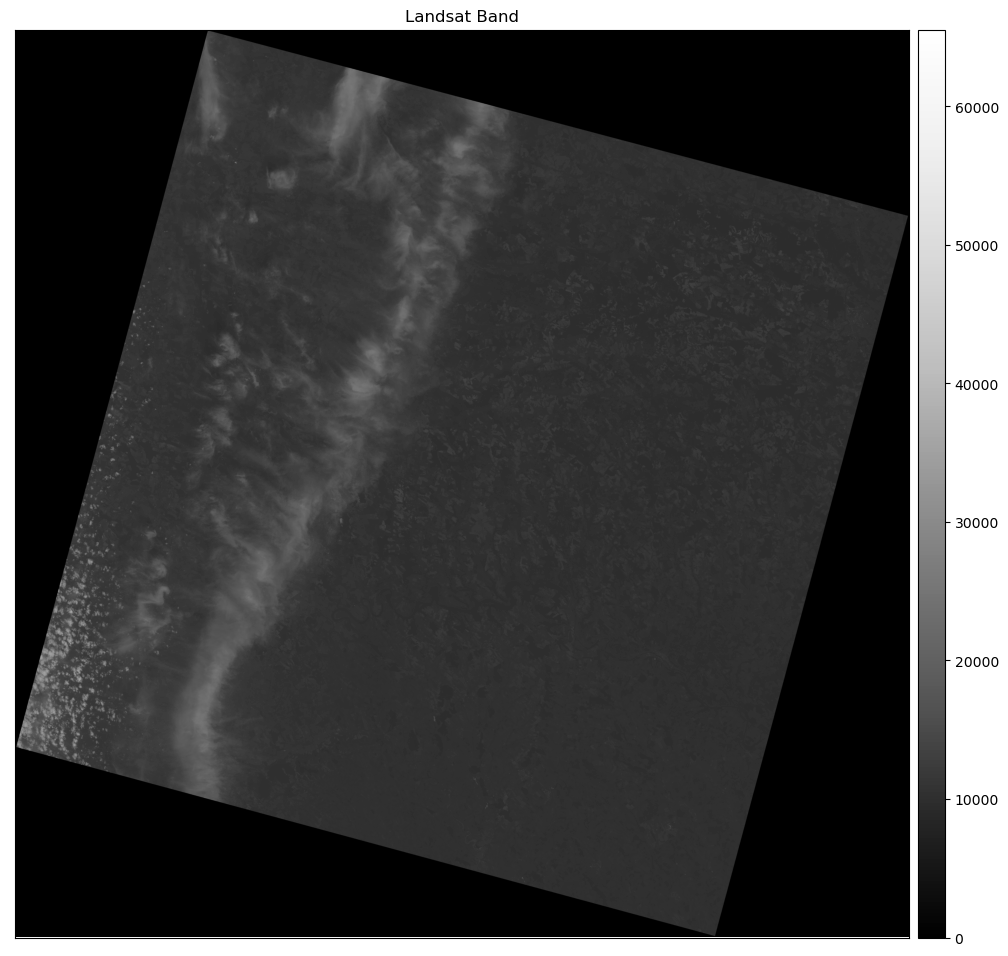

<AxesSubplot:title={'center':'Landsat Band'}>

In [7]:
# Open the TIF file using rasterio
# with rio.open(all_landsat_post_bands[3]) as src:
with rio.open(all_landsat_post_bands[0]) as src:
    tif_file = src.read()

# Plot the .TIF file using EarthPy
ep.plot_bands(tif_file[0],
              title="Landsat Band",
              scale=False)
# plt.show()

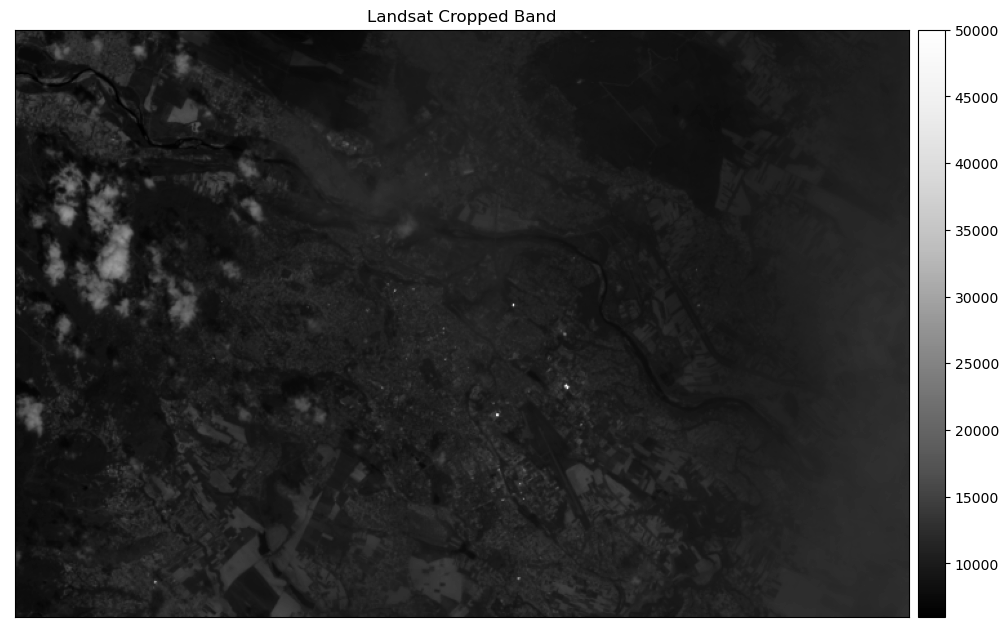

In [7]:
# Open up boundary extent in GeoPandas
from shapely.geometry import Polygon
d = {'geometry': [Polygon([(25.81, 48.35), (26.07, 48.34), (26.09, 48.23), (25.81, 48.23), (25.81, 48.35)])]}
crop_gdf = gpd.GeoDataFrame(d, crs="EPSG:4326")
# Open a single band and plot
with rio.open(all_landsat_post_bands[8]) as src:
    # Reproject the fire boundary shapefile to be the same CRS as the Landsat data
    crop_raster_profile = src.profile
    fire_boundary_utmz13 = crop_gdf.to_crs(crop_raster_profile["crs"])
    # Crop the landsat image to the extent of the fire boundary
    landsat_band4, landsat_metadata = es.crop_image(src, fire_boundary_utmz13)
ep.plot_bands(landsat_band4[0],
              title="Landsat Cropped Band",
              scale=False)
plt.show()


### Crop all

In [8]:
cropped_folder = "cropped-images"
if not os.path.isdir(cropped_folder):
    os.mkdir(cropped_folder)
cropped_file_list = es.crop_all(all_landsat_post_bands,
                                cropped_folder,
                                fire_boundary_utmz13,
                                overwrite=True,
                                verbose=True)
cropped_file_list

['cropped-images\\LC81830262015142LGN00_B1_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B10_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B11_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B2_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B3_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B4_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B5_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B6_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B7_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B8_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B9_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF']

In [9]:

cropped_file_list = ['cropped-images\\LC81830262015142LGN00_B1_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B2_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B3_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B4_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B5_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B6_crop.TIF',
 'cropped-images\\LC81830262015142LGN00_B7_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B8_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B9_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B10_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_B11_crop.TIF',
#  'cropped-images\\LC81830262015142LGN00_BQA_crop.TIF'
 ]

In [10]:
stack_folder = "stackOutput"
if not os.path.isdir(stack_folder):
    os.mkdir(stack_folder)
landsat_post_path = os.path.join(stack_folder, "stack.tif")
# This will create a new stacked raster with all bands
land_stack, land_meta = es.stack(cropped_file_list, landsat_post_path)
land_stack

array([[[12807, 12589, 12588, ..., 16535, 16605, 16625],
        [12806, 12528, 12599, ..., 16527, 16576, 16623],
        [12516, 12531, 12447, ..., 16544, 16635, 16675],
        ...,
        [11747, 11713, 12081, ..., 18354, 18359, 18348],
        [11688, 11740, 11870, ..., 18361, 18344, 18325],
        [11501, 11592, 11995, ..., 18353, 18324, 18366]],

       [[12021, 11655, 11780, ..., 15775, 15847, 15921],
        [12017, 11689, 11764, ..., 15788, 15886, 15931],
        [11635, 11663, 11645, ..., 15775, 15928, 16020],
        ...,
        [10825, 10864, 11301, ..., 17717, 17721, 17692],
        [10724, 10686, 10969, ..., 17675, 17690, 17695],
        [10547, 10611, 10940, ..., 17681, 17653, 17707]],

       [[11295, 11123, 11168, ..., 14717, 14797, 14807],
        [11420, 11093, 11084, ..., 14715, 14784, 14835],
        [10990, 11249, 11246, ..., 14732, 14790, 14824],
        ...,
        [10173,  9985, 10450, ..., 16552, 16534, 16540],
        [ 9939, 10035, 10223, ..., 16523, 165

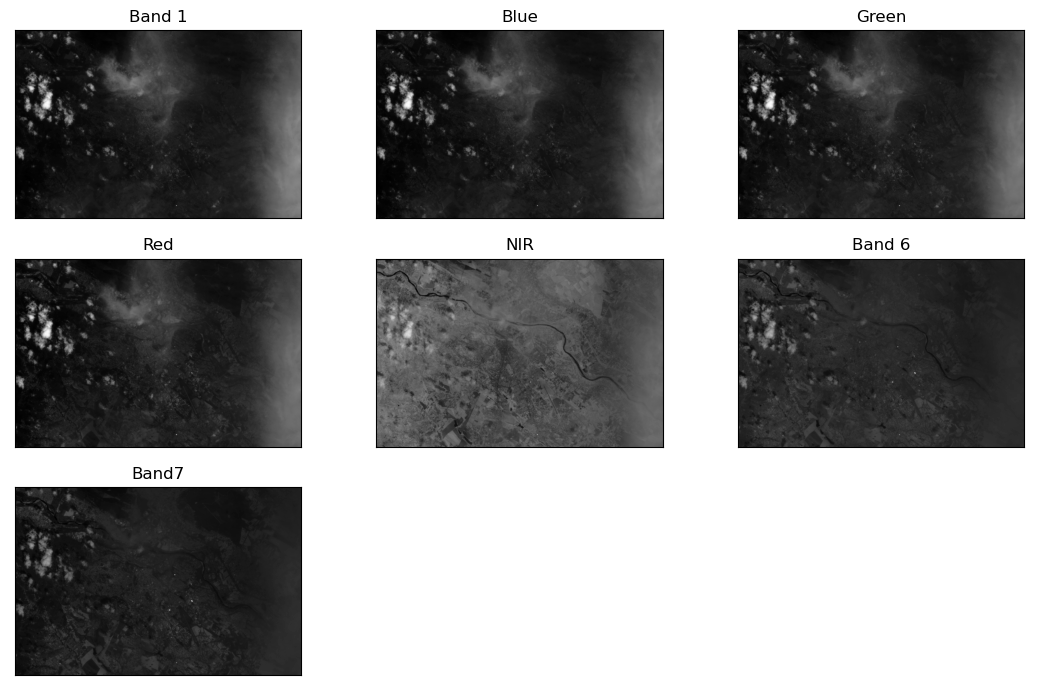

In [11]:
# Plot all bands using earthpy
band_titles = ["Band 1", "Blue", "Green", "Red",
               "NIR", "Band 6", "Band7"]

ep.plot_bands(land_stack,
              figsize=(11, 7),
              title=band_titles,
              cbar=False)
plt.show()


### Робота з хмарами